# kNN 算法
## 0. 机器学习基本概念

机器学习的分类：classification 

监督学习： 有特征，有标签。


邮件分类：
标签值： 是或否 （0或1）分立的标签值。


小李 ：

特征1 特征2(feature)   目标targets（标签labels）

年龄， 收入， 2000元

数据集：

小李 20    30000   1000  （样本）

小王 30    55000   2000

...

小钱 


全新的数据：

小陈  40   59000   ？

如果目标值可以取某个范围内的连续的值，这样一种监督学习算法，成为回归。
如果目标值只可以取某某些分立的值（类别），这样一种监督学习算法，成为分类。

两个概念

训练：--> 模型
测试： 用新的数据输入给模型，返回预测结果。

训练集： 用于训练的数据集。
测试集： 用于测试的数据集。


非监督学习：数据集中只有特征（Features）: PCA, k-Means.

强化学习：MinMax算法.

## 数据集

In [2]:
import mglearn
import matplotlib.pyplot as plt

In [3]:
# 生成数据集
X, y = mglearn.datasets.make_forge()

In [4]:
X[:4]

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016]])

In [5]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [6]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

X.shape:(26, 2)


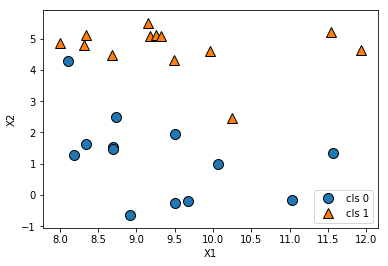

In [7]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["cls 0","cls 1"])
plt.xlabel("X1")
plt.ylabel("X2")
print("X.shape:{}".format(X.shape))
plt.show()

## 1. 求N维空间中的点的距离

In [8]:
import numpy as np

p1 = np.array([1,1.5,.5,1])
p2 = np.array([0,0,0,0])

def distance(p1,p2):
    """计算两点的距离"""
    return np.sqrt(np.sum(np.power(p1-p2,2)))

distance(p1,p2)

2.1213203435596424

## 2. 投票函数

In [9]:
# count_words(text). 类似，定义： count_votes(votes)
def count_votes(votes):
    count_dict= {}
    for vote in votes:
        # 见过的vote
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的vote
        else:
            count_dict[vote] = 1
    return count_dict

votes = [1,2,3,4,2,2,3,2,3,2,3,3]
vote_count = count_votes(votes)
vote_count

{1: 1, 2: 5, 3: 5, 4: 1}

In [10]:
max_count = max(vote_count.values())
max_count

5

items(): 同时提取出字典的关键字和对应的值

In [11]:
for vote,counts in vote_count.items():
    print(vote,count)

NameError: name 'count' is not defined

In [ ]:
winner =[]
max_count = max(vote_count.values())
for vote,counts in vote_count.items():
    if counts == max_count:
        print(vote,counts)
        winner.append(vote)
        print(winner)

In [ ]:
# 投票函数 majority_vote(votes)
import random

def majority_vote(votes):
    count_dict= {}
    for vote in votes:
        # 见过的vote
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的vote
        else:
            count_dict[vote] = 1
    
    winner =[]
    max_count = max(count_dict.values())
    for vote,counts in count_dict.items():
        if counts == max_count:
            #print(vote,counts)
            winner.append(vote)
    return random.choice(winner)

print(votes)
print("count_dict:", count_votes(votes) )

majority_vote(votes)

从一个序列中出现频率最高的元素，这个过程叫模式。（Mode）
如何从NumPy数组中找到Mode?

In [ ]:
import scipy.stats as ss

def majority_vote(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

print(votes)
majority_vote(votes)

## 4. 如何找出最近邻居？

In [ ]:
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])

plt.plot(points[:,0],points[:,1], 'bo')
plt.plot(p[0],p[1], 'ro')
plt.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()


In [ ]:
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])

distances = np.zeros(points.shape[0])
print("distance:",distances)
for i in range(len(distances)):
     distances[i]= distance(p,points[i])

print("distance:",distances)

plt.plot(points[:,0],points[:,1], 'bo')
plt.plot(p[0],p[1], 'ro')
plt.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()


In [ ]:
# 定义找最近邻的函数： find_knn(p,points,k)
def find_knn(p,points,k):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]= distance(p,points[i])
    #对distances做argsort()排序，返回索引
    ind = np.argsort(distances)
    #返回索引范
    return ind[0:k]
        
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])
find_knn(p,points,k=5)

## 5. 预测一个新点的类别.
 方法：找出距离p点最近的k个邻居
      找出这些邻居落在各类的次数（类似于“词语在文本出现的频率”）

In [ ]:
# knn_predict(p,points,outcomes,k)
def knn_predict(p,points,outcomes,k=3):
    """返回新点p的类别"""
    #找出最近的k个邻居
    ind = find_knn(p,points,k)
    #调用投票函数
    return majority_vote(outcomes[ind])
    
#类别设定: 标签
# 0: 离原点近的点
# 1： 离原点远的点

outcomes = np.array([0,0,0,0,1,1,1,1,1])

points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([0.3,0])
res = knn_predict(p,points,outcomes,k=3)
print("所属的类别：",res)

plt.plot(points[:,0],points[:,1], 'bo')
plt.plot(points[:4,0],points[:4,1], 'go')
plt.plot(p[0],p[1], 'ro')
plt.axis([-1.5, 1.5, -1.5, 1.5])
     

## 6. 生成数据 

In [ ]:
ss.norm(0,1).rvs((5,2))

In [ ]:
ss.norm(1,1).rvs((5,2))

In [ ]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))),axis=0)

In [ ]:
def generate_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1.5,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

generate_data()

In [ ]:
points, outcomes = generate_data(n=50)
plt.figure()
n=50
plt.plot(points[:n,0],points[:n,1], 'bo')
plt.plot(points[n:,0],points[n:,1], 'go')


## 6.  生成格点(grid)


In [ ]:
def make_pred_grid(predictors, outcomes,limits,h,k):
    (x_min,x_max, y_min, y_max) = limits
    xs = np.arange(x_min,x_max, h) # h: 步长
    ys = np.arange(y_min,y_max, h) 
    xx, yy = np.meshgrid(xs,ys)
    
    pred_grid = np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            pred_grid[j,i] = knn_predict(p,predictors,outcomes,k)
    
    return (xx,yy,pred_grid)

## 7. 对格点作图

In [ ]:
#import matplotlib.pyplot as plt
# 可以下载
def plot_pred_grid(xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink", "yellowgreen","lightskyblue"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    

(predictors, outcomes) = generate_data(n=50)
k = 3
h = 0.1
limits =(-3,4,-3,4)
filename = 'data_knn_5.pdf'
(xx,yy,pred_grid) = make_pred_grid(predictors, outcomes,limits,h,k)
plot_pred_grid(xx, yy, pred_grid, filename)
    
    

## 8. Scikit-Learn

In [ ]:
import pandas as pd

# 生成数据集
X_train = pd.DataFrame([[0,1],[1,0],[2,5],[3,5],[4,3]])
y_train = [0,0,1,1,1]
X_train

In [ ]:
y

分类器： KNeighborsClassifier(k=3)

n_neighbors: 

weights: 权重(默认取1)

algorithm: 优化的算法.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 实例化分类器
model = KNeighborsClassifier(n_neighbors=3)
#拟合： fit
model.fit(X_train,y_train)

In [ ]:
model.predict([[0,0],[2,0]])

题目： 
数据集：

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

#数据集
# iris 
# X
predictors = iris.data[:,0:2] 
# y
outcomes = iris.target

#(1) plotting
plt.plot(  [:,0], predictors[outcomes==0][:,1],'ro')
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1],'')

#knn 计算
make_pred_grid()
plot_pred_grid()



#(2) Scikitlearn KNeighborsClassifier 来实现同样的数据集的分类


#（3）对比结果


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

#数据集
# iris 
# X
predictors = iris.data[:,0:2] 
# y
outcomes = iris.target

In [ ]:
outcomes

In [ ]:
## 作业

## kNN 算法的基本操作步骤：
    #导入sklearn相关的库
    # 生成数据集 X，y
    # 把数据集分离成训练集和测试集
    # 实例化你的分类器（回归器）

    #拟合fit(X,y), 生成模型
    # 预测类别，目标值，类别的边界
    #主要的参数： k

数据集数据： (19, 2)
predictions: [0 0 0 0 0 0 0]
准确度： 0.42857142857142855


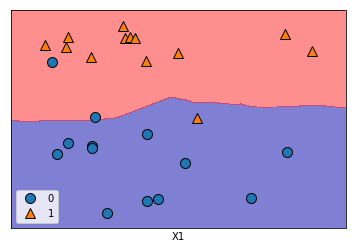

In [31]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#生成数据集
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print("数据集数据：",X_train.shape)
#print("测试数据",X_test)
#训练模型
n_neighbors = 18
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train,y_train) # 模型 clf

# 测试
print("predictions: {}".format(clf.predict(X_test)))
print("准确度：",clf.score(X_test,y_test))

# Step 2:
clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)

# 散点图 scatter : 对两个特征的相关性进行分析
# X1 增大时，X2也增大
mglearn.plots.plot_2d_separator(clf, X, fill=True,eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("X0")
plt.xlabel("X1")
plt.legend(loc=3)
plt.show()


k越大， 边界越光滑；

k越大，模型越简单；k越大，模型越复杂。k极其大时，模型失去了预测能力（简单化）。

k需要适当取大一点（3-10）

k取很小时，对训练集预测准确率很高； 但是对测试集，准确率很低。

### 什么是过拟合？欠拟合？ 如何避免过拟合？（overfitting）
适当调整k的值.

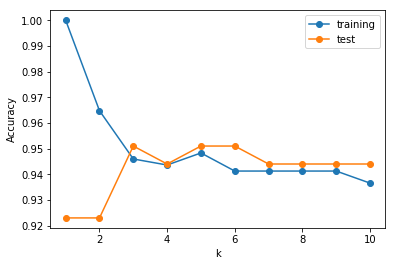

In [39]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=3)

a =[]
a_test =[]

# 对不同的k值，分别对照准确度
neighbors = range(1,11)

for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    a.append(clf.score(X_train,y_train))
    a_test.append(clf.score(X_test,y_test))

    
plt.plot(neighbors, a, "o-", label="training")
plt.plot(neighbors, a_test, "o-", label="test")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 11. kNN回归

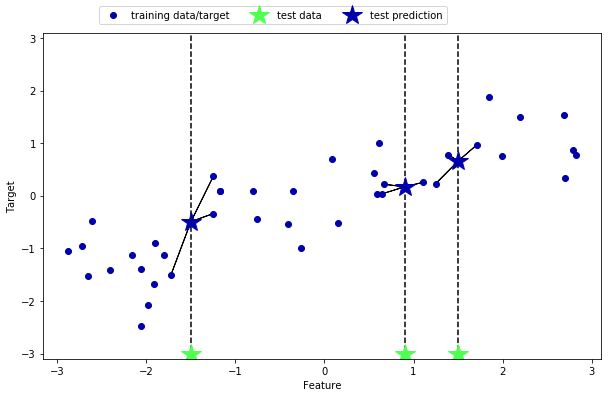

In [41]:
# 分离数据集
from sklearn.datasets import load_breast_cancer

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()


### kNN回归分析

In [42]:
from sklearn.neighbors  import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#回归模型
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [43]:
print("X_test:", X_test)

X_test: [[ 0.55448741]
 [ 2.81945911]
 [-2.87649303]
 [-0.02893854]
 [ 1.39196365]
 [ 0.08540663]
 [ 1.10539816]
 [-1.97685526]
 [-1.24713211]
 [-2.06388816]
 [ 2.69331322]
 [ 1.85038409]
 [-1.80195731]]


In [44]:
print("Predictions:\n{}".format(reg.predict(X_test)))

Predictions:
[ 0.68896417  0.43848302 -0.81522381  0.1651502   0.31821632  0.32709629
 -0.17612523 -1.02098696 -0.07009828 -1.43420766  0.43848302  1.62632353
 -0.99456101]


### 决定系数、 判定系数， 拟合优度 （reg.score()）
取值：(0,1)区间

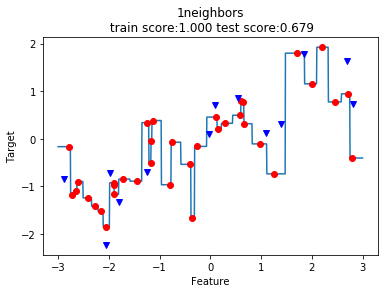

In [55]:
line = np.linspace(-3, 3, 1000).reshape(-1,1)
n_neighbors = 1 # 可选
reg = KNeighborsRegressor(n_neighbors=n_neighbors)
reg.fit(X_train,y_train) # 模型生成

X_t1= np.array([[4]])
plt.plot(line[:,0],reg.predict(line))
plt.plot(X_train[:,0],y_train,'o',c='r')
plt.plot(X_test[:,0],y_test,'v',c='b')
#plt.plot(X_t1[:,0],reg.predict(X_t1),'v',c='b')

plt.title("{}neighbors\n train score:{:.3f} test score:{:.3f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()